<h1><center>Quantitative genetics with
<span style="color:red">multi-omic</span> and <span style="color:red">non-standard</span> phenotypes</center></h1>
<br>
<p><center>*Aaron Brooks*</center></p>
<p><center>Steinmetz lab meeting</center></p>
<p><center>14.03.2015</center></p>

<center><img src="./src/qtls4breakfast/qtl4breakfast-01.png"></center>

In [1]:
# load libraries and stuff
options(repr.plot.width = 6)
options(repr.plot.height = 5)
options(jupyter.plot_mimetypes = 'image/png')
library(ggplot2);
library(plyr);
library(dplyr);
library(reshape2);
library(LSD);
library(qtl);
library(pheatmap);
library(parallel);
options(mc.cores = 24);
library(stringr);
library(RColorBrewer);

# load data
endo_f = "~/Desktop/tmpdata/endometabolite_full_12102015.rda"
load(endo_f)

# use only relaitve data
endometabolite = filter(endometabolite, time_format == "relative")

#head(endometabolite)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘LSD’

The following object is masked from ‘package:ggplot2’:

    plotmatrix



## Two projects:

- ### Multi-omic profiling of intermediate traits in SxY cross: GenPhen
    - Metabolomics, transcriptomics, and proteomics
    - Collaboration with <u>Chenchen</u> and Linster lab at University of Luxembourg

- ### **New** computational approach for QTL detection with non-standard phenotypes
    - clustQTL: a clustering-based QTL detection method

- ### Multi-omic profiling of intermediate traits in SxY cross: GenPhen
    - <span style="color:red"><u>Metabolomics</u></span>, transcriptomics, and proteomics
    - Collaboration with <u>Chenchen</u> and Linster lab at University of Luxembourg

<h3><center>How do our genes and the environment make us who we are?</center></h3>
<center><img src="./src/tall_short.jpg" width=250px></center>

<center>Phenotype (P) = Genotype (G) + Environment (E)</center>

<center><img src="./src/g2p_blackbox.png" height="500px"></center>

<center><img src="./src/nrg3868-f1.jpg" width="900px"></center>
<p style="text-align:center"><small><center>[Ritchie, M. D., et al. 2015.](http://www.nature.com/nrg/journal/v16/n2/abs/nrg3868.html)</em></center></small></p>

<center><img src="./src/g2p_multiomic.png" height="500px"></center>

<center><blockquote><p>Identify points in molecular networks that can be targeted to modulate phenotype in different genetic and environmental contexts.</p><p style="text-align:right">- GenPhen Proposal, 2014</p></blockquote><center>


<center><img src="./src/abrooks_talk.003.png" width="800px"></center>
<p><small>60,000 SNPs and approximately 6,000 indels [in YJM789] with respect to the reference S288c genome</small></p>
<p style="text-align:right"><small>- [Wu W. et al. 2007](http://www.pnas.org/content/104/31/12825.long)</small></p>


<center><img src="./src/method_genphen1-01.png" width="800px"></center>


<center><img src="./src/method_genphen2-01.png" width="800px"></center>


<h2><center>What is a quantitative trait loci (QTL)?<center></h2>

In [2]:
lodeffect = 
'<style>
#wrapper1 { width: 1200px; height: 525px; padding: 0;  overflow: hidden;}
#scaled-frame1 { width: 2000px; height: 1000px; border: 0px; }
#scaled-frame1 {
    zoom: 0.56;
    -moz-transform: scale(0.56);
    -moz-transform-origin: 0 0;
    -o-transform: scale(0.56);
    -o-transform-origin: 0 0;
    -webkit-transform: scale(0.56);
    -webkit-transform-origin: 0 0;
}

@media screen and (-webkit-min-device-pixel-ratio:0) {
 #scaled-frame1  { zoom: 1;  }
}
</style>

<div id="wrapper1"><iframe id="scaled-frame1" src="http://www.biostat.wisc.edu/~kbroman/D3/lod_and_effect/"></iframe></div>
'

In [3]:
IRdisplay::display_html(lodeffect)
# from Karl Broman: https://www.biostat.wisc.edu/~kbroman/D3/lod_by_time/

<h3><center>Intermediate Phenotype #1:<br><em>Metabolites of central metabolism, TCA cycle</em></center></h3>
<center><img src="./src/parental_cycle-01.png" width=600px></center>

<h2><center>QTLs for dynamical data<br> (function-valued traits)<center></h2>

In [4]:
qtltimescan = 
'<style>
#wrapper2 { width: 1000px; height: 525px; padding: 0; overflow: hidden; }
#scaled-frame2 { width: 1500px; height: 1800px; border: 0px; }
#scaled-frame2 {
    zoom: 0.71;
    -moz-transform: scale(0.71);
    -moz-transform-origin: 0 0;
    -o-transform: scale(0.71);
    -o-transform-origin: 0 0;
    -webkit-transform: scale(0.71);
    -webkit-transform-origin: 0 0;
}

@media screen and (-webkit-min-device-pixel-ratio:0) {
 #scaled-frame2  { zoom: 1;  }
}
</style>

<div id="wrapper2"><iframe id="scaled-frame2" src="https://www.biostat.wisc.edu/~kbroman/D3/lod_by_time/"></iframe></div>
'

In [5]:
IRdisplay::display_html(qtltimescan)
# from Karl Broman: https://www.biostat.wisc.edu/~kbroman/D3/lod_by_time/

<h3><center>Metabolites of central metabolism: TCA cycle</center></h3>
<center><img src="./src/parental_cycle-01.png" width=600px></center>
<h4><center><span style="color:red">Are there differences between the parental strains?</span></center></h4>

<p style="text-align:center"><u><b style="color:red">16</b></u> out of <b style="color:red">26</b> metabolites that were detected in both parental strains are different between S288c and YJM789</p>
<br>
<p style="text-align:center"><small><center><em>One-way ANOVA as in [Breunig, J. S., et al. 2014](http://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1004142)</em></center></small></p>

<h3><center><u>29</u> metabolites measured in <u>104</u> strains at <u>4</u> timepoints in exponential growth</center></h3>

<center><img src="./src/metabolome_strains.png" width=800px></center>


In [6]:
repdata = endometabolite %>%
    group_by(metabolite,strain) %>%
    filter(.,time_format=="relative") %>%
    do({
    x = filter(.,replicate==1)
    y = filter(.,replicate==2)
    t = sort(intersect(x$time,y$time))
    x.log2 = x$value.log2[x$time%in%t]
    y.log2 = y$value.log2[y$time%in%t]
        x.diffBYmean = x$derivative.log2[x$time%in%t]/mean(x.log2)
    y.diffBYmean = y$derivative.log2[y$time%in%t]/mean(y.log2)
    if (length(x.log2)==length(y.log2)) {
      data.frame(x.log2 = x.log2, y.log2 = y.log2,
                x.diffBYmean = x.diffBYmean, y.diffBYmean = y.diffBYmean)
    } else {
      data.frame()
    }
})
options(repr.plot.width = 10)
options(repr.plot.height = 5)

<h2><center><u>Observation:</u> the measurements are highly reproducible across biological replicates</center></h2>


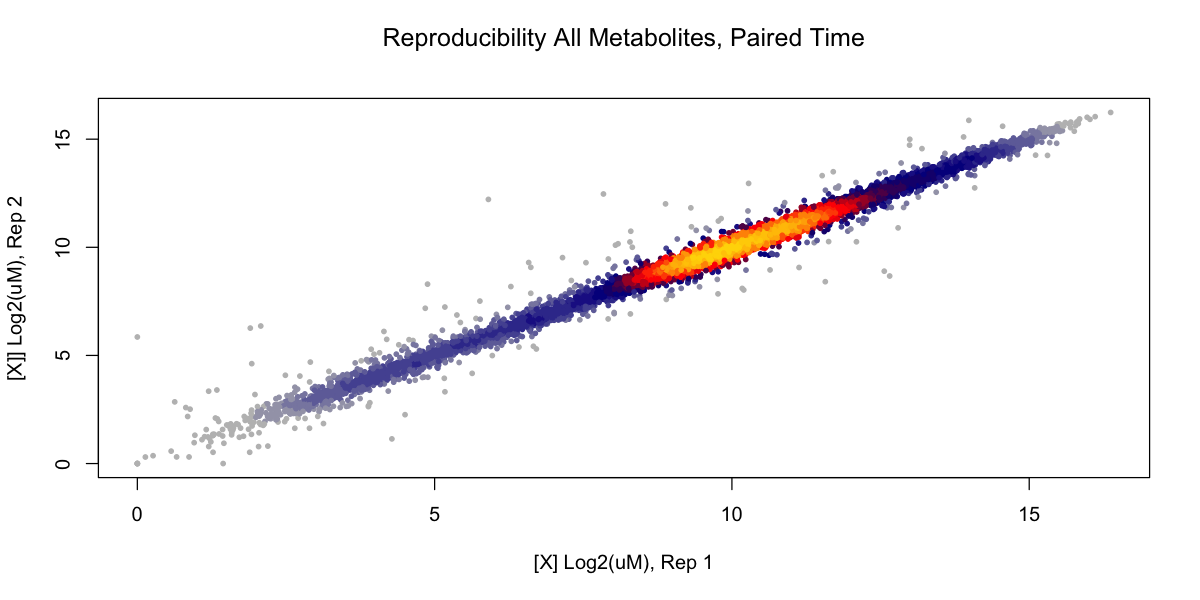

In [7]:
heatscatter(repdata$x.log2,repdata$y.log2,
    main="Reproducibility All Metabolites, Paired Time", 
    ylab="[X]] Log2(uM), Rep 2",xlab="[X] Log2(uM), Rep 1")

In [8]:
thisylim = c(min(c(repdata$x.log2,repdata$y.log),na.rm=T),max(c(repdata$x.log2,repdata$y.log),na.rm=T))
thisxlim = c(min(c(repdata$x.log2,repdata$y.log),na.rm=T),max(c(repdata$x.log2,repdata$y.log),na.rm=T))

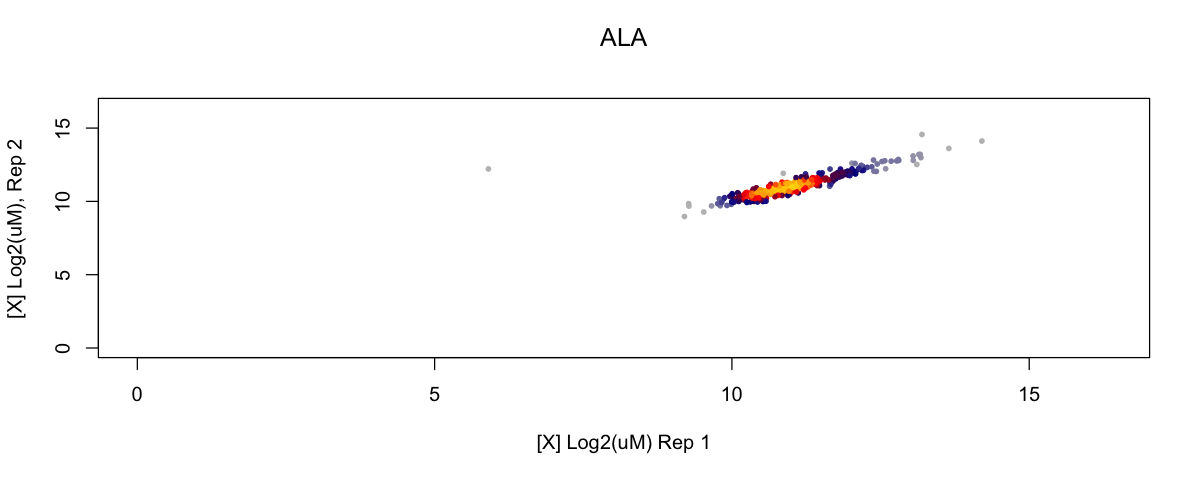

In [25]:
metabolite = "ALA" 
d = repdata[which(repdata$metabolite==metabolite),]
heatscatter(d$x.log2,d$y.log2,main=metabolite,ylab="[X] Log2(uM), Rep 2",
            xlab="[X] Log2(uM) Rep 1", ylim=thisylim,xlim=thisxlim)

<h3><center>Reproducibility in other -omics: 3'T-fill protocol</center></h3>
<center><img src="./src/transcripts_repoducibility.png" width=600px></center>

<h3><center>Why is the data so good?</center></h3>


<h3><center>Cultivation Strategy: Pre-culture vs Working Cell Bank </center></h3>
<center><img src="./src/method.png" width=400px></center>

<small><center><em>Nicole Paczia</em></center></small>

<h3><center>Growth variation across bioreps: <u>universal initial culture</u></center></h3>
<br>
<center><img src="./src/preculture.png" width=800px></center>

<small><center><em>Nicole Paczia</em></center></small>

<h3><center>Growth variation across bioreps: <u>pre-culture method</u></center></h3>
<br>
<center><img src="./src/preculture_final.png" width=800px></center>
<p><small><center><em>Nicole Paczia</em></center></small></p>

<h3><center>Growth variation across bioreps: <u>working cell bank</u></center></h3>
<br>
<center><img src="./src/wcb2.png" width=800px></center>

<small><center><em>Nicole Paczia</em></center></small>

<h3><center>Growth variation across bioreps: working cell bank, <u>initial characterization</u></center></h3>
<br>
<center><img src="./src/wcb1.png" width=600px></center>

<p style="text-align:center">Notice: Initial working cell bank cultures are not aligned!</p>

<small><center><em>Nicole Paczia</em></center></small>

<h2><center><u>Claim:</u> 'Aligning' growth with working cell bank method increases reproducibility and therefore increases signal to detect QTLs</center></h2>

<center><img src="./src/Screen Shot 2016-03-13 at 2.22.44 PM.png" width=700px></center>

<small><center><em>Nicole Paczia</em></center></small>

<center><img src="./src/Screen Shot 2016-03-13 at 2.22.29 PM.png" width=700px></center>

<small><center><em>Nicole Paczia</em></center></small>

<h2><center>High-precision data: opportunities (and consequences)</center></h2>

<p><center>Within our experimental context: <br><br>high-precision $\implies$ high-heritability</center></p>

<h2><center>What is heritability?</center></h2>

<center>Phenotype (P) = Genotype (G) + Environment (E)</center>

<h2><center>Two kinds of heritability:</center></h2>
<p>
<center>
    <li><span style="color:red">Broad-sense heritability, $H^2$</span></li>
    <li>Narrow-sense heritability $h^2$</li>
</center>
</p>

<h2><center>How is broad-sense heritability calculated?</center></h2>

<center>$\sigma^2_P = \sigma^2_G + \sigma^2_E$</center>

<center>$H^2$ = $\frac{\sigma^2_G}{\sigma^2_P}$</center>

<p><small><center><em>[Visscher, P. M., et al. 2008.](http://www.nature.com/nrg/journal/v9/n4/abs/nrg2322.html)</em></center></small></p>

<h2><center>Replicates can be used as a proxy for the environmental component</center></h2>

$$\hat\sigma^2_s=\frac{\sum_{r=1}^2 (X_{sr}-\bar X_s)^2}{2} . \frac{2}{2-1}$$

$$H^2=1-\frac{\sum_s^S 2 \hat\sigma_s^2}{\sum_s^S \sum_{r=1}^2 (X_{sr}-\bar X)^2}$$

<p><small><center><em>[Breunig, J. S., et al. 2014](http://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1004142)</em></center></small></p>

<center><img src="./src/H2.svg" width=700px></center>

<h2><center>Are we able to detect loci associated with these "highly-heritable" metabolite levels?</center></h2>

<center><img src="./src/mQTLs.png" width=700px></center>

<h3><center>Few QTLs. QTL hotspot on chr13.</center></h3>
<p><center><span style="color:red">10 out of 16 metabolites with QTL</span></center></p>
<p><center>Breunig et al: 34 out of 74 metabolites with QTL</center></p>

In [10]:
# load normalized QTLs
load("~/Desktop/tmpdata/mQTLs_comball_funqtl_2014.rda")

In [11]:
options(repr.plot.width = 10)
options(repr.plot.height = 4)
m_mlod = max(as.numeric(unlist(lapply(seq(1:length(mQTLs_funqtl_2014)),
                                      function(i){try(max(mQTLs_funqtl_2014[[i]]$qtls_alt[,'mlod']))}))), na.rm = T)

Warning message:
In eval(expr, envir, enclos): NAs introduced by coercion

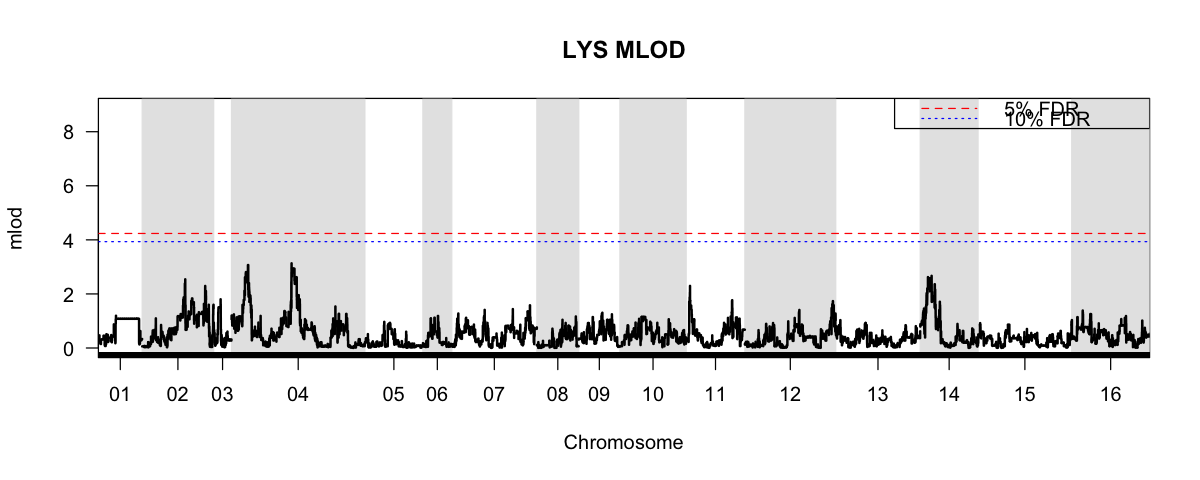

In [29]:
metabolite = "LYS"
plot(mQTLs_funqtl_2014[[metabolite]]$qtls_alt, lodcolumn=2, ylim=c(0,m_mlod), 
     main=paste(metabolite,"MLOD"), bandcol="gray90")
abline(h=summary(mQTLs_funqtl_2014[[metabolite]]$permout)["5%","mlod"], col="red", lty=2)
abline(h=summary(mQTLs_funqtl_2014[[metabolite]]$permout)["10%","mlod"], col="blue", lty=3)
legend("topright", y.leg[metabolite], c("5% FDR","10% FDR"), lty = c(2, 3), col = c("red","blue"))

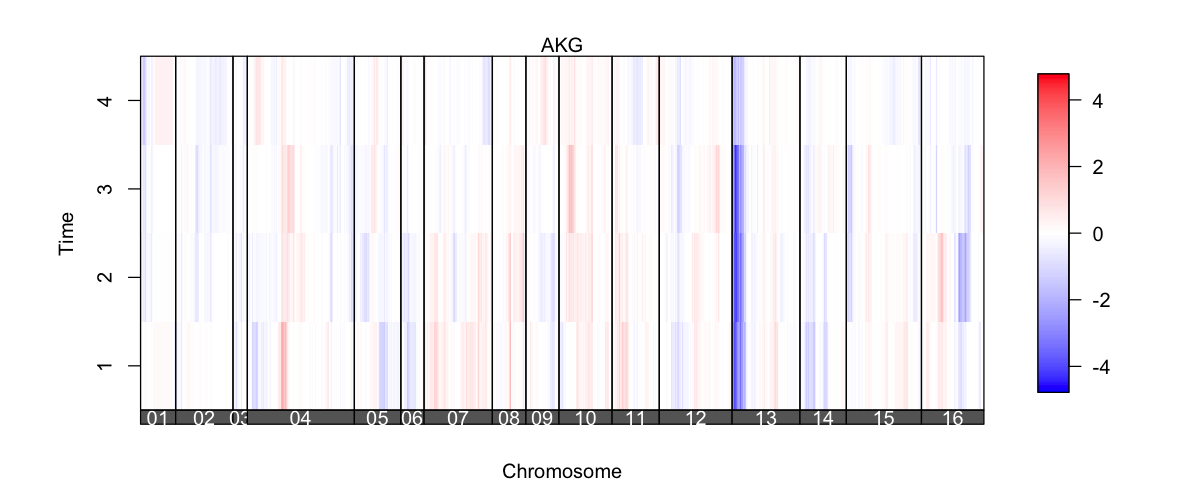

In [13]:
# effect
metabolite = "AKG"
funqtl::plotlod(mQTLs_funqtl_2014[[metabolite]]$qtls, mQTLs_funqtl_2014[[metabolite]]$eff, 
        mQTLs_funqtl_2014[[metabolite]]$pcols, gap=25, ylab="Time")
mtext(metabolite, side = 3)

In [14]:
mQTLi = 
'<style>
#wrapper3 { width: 1000px; height: 550px; padding: 0; }
#scaled-frame3 { width: 1200px; height: 3000px; border: 0px; }
#scaled-frame3 {
    zoom: 0.7;
    -moz-transform: scale(0.7);
    -moz-transform-origin: 0 0;
    -o-transform: scale(0.7);
    -o-transform-origin: 0 0;
    -webkit-transform: scale(0.7);
    -webkit-transform-origin: 0 0;
}

@media screen and (-webkit-min-device-pixel-ratio:0) {
 #scaled-frame3  { zoom: 1;  }
}
</style>

<div id="wrapper3"><iframe id="scaled-frame3" src="http://steinmetzlab.embl.de/shiny/mQTL/"></iframe></div>
'

In [26]:
IRdisplay::display_html(mQTLi)

<h3><center>Lack of mQTLs consistent with phenotypic buffering hypothesis</center></h3>

<center><img src="./src/F1.large.jpg", width="600px"></center>
<br>
<p style="text-align:center"><small><em>[Battle A., et al. 2015](http://science.sciencemag.org/content/347/6222/664)</em></small></p>

<h3><center>Heritability and variance explained by QTLs: BYxRM cross</center></h3>
<br>
<center><img src="http://journals.plos.org/plosgenetics/article/figure/image?size=large&id=info:doi/10.1371/journal.pgen.1004142.g009" width=600px></center>

<small><center><em>[Breunig, J. S., et al. 2014](http://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1004142)</em></center></small>

<h3><center>Heritability and variance explained by QTLs: SxY cross</center></h3>
<center><img src="./src/broadsenseH2.svg" width=1000px></center>

<h2>Why differences? <span style="color:red">Us</span> vs Breunig et al.</h2>

- Differences between strains? Strains differ at <span style="color:red">~0.5%</span> vs. ~0.6% of bp
- Difference in power? <span style="color:red">104</span> vs 114 strains
- Different culture conditions? <span style="color:red">YNB + amino acids$^*$</span> vs YNB - amino acids$^{**}$

<p><small>$^*$ 6.7 g l-1 Yeast Nitrogen base w/o amino acids, 1.92 g l-1 Yeast Supplement dropout, 76 mg l-1 Uracil, 10 g l-1 Glucose<br>
$^{**}$ supplemented with leucine, lysine and uracil to complement the strain auxotrophies</p></small>

<h1><center>?</center></h1>

<center><img src="./src/mQTLs_mod.png" width=700px></center>

<h3><center>Focus on QTL hotspot on chr13.</center></h3>

<h2><center>Can we identify causal genes (SNPs)?</center></h2>

<p style="text-align:center">Better yet: can we leverage other data (transcriptomics/proteomics) to reduce # candidates?</p>

<h2><center>Some eQTLs LOD profiles highly correlate with mQTLs on chr13</center></h2>

<center><img src="./src/eQTL.gif" width=800></center>

<h2><center>High correlation of some eQTLs across multiple mQTLs</center></h2>

<center><img src="./src/mQTL-eQTL_cor.png" width=600></center>

<h2><center>QTL chr13 candidate: <span style="color:red"><u>BUL2</u></span></center></h2>

In [27]:
IRdisplay::display_html(mQTLi)

In [17]:
bul2 = 
'<style>
#wrapper4 { width: 1200px; height: 525px; padding: 0;  overflow: hidden;}
#scaled-frame4 { width: 2000px; height: 1000px; border: 0px; }
#scaled-frame4 {
    zoom: 0.56;
    -moz-transform: scale(0.56);
    -moz-transform-origin: 0 0;
    -o-transform: scale(0.56);
    -o-transform-origin: 0 0;
    -webkit-transform: scale(0.56);
    -webkit-transform-origin: 0% 0;
}

@media screen and (-webkit-min-device-pixel-ratio:0) {
 #scaled-frame4  { zoom: 1.1;  }
}
</style>

<div id="wrapper4"><iframe id="scaled-frame4" src="http://www.yeastgenome.org/locus/bul2/overview"></iframe></div>
'

In [18]:
IRdisplay::display_html(bul2)

<center><img src="http://www.molbiolcell.org/content/17/7/3031/F13.large.jpg", width="800px"></center>
<br>
<p style="text-align:center"><small><em>[Rubio-Texeira, M., and Kaiser, C. A. 2006.](http://www.molbiolcell.org/content/17/7/3031.short)</em></small></p>

<h2><center>Don't be a <b><u>Drumpf!</u></b></center></h2>
<center><img src=https://media.giphy.com/media/l2JJzZfUZAHugzB6g/giphy.gif style="width:800px"></center>

<h4><center>Natural Polymorphism in BUL2 Links Cellular Amino Acid Availability with Chronological Aging and Telomere Maintenance in Yeast</center></h4><br>

<center><img src="./src/bul2.png" style="width:800px"></center>

<p style="text-align:center"><small><em>[Kwan, EX et al. 2011.](http://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1002250)</em></small></p>

<center><img src="./src/parental_cycle-01.png" width=600px></center>

<center><img src="./src/mlevels_qtl.png" style="width:800px"></center>

<center><img src="./src/mlevels_qtl_sig.png" style="width:500px"></center>

<h2><center>Another ubiquitin-related protein associated with Trp mQTL on chr13?: <span style="color:red"><u>UBP15</u></span></center></h2></center></h2>

In [28]:
IRdisplay::display_html(mQTLi)

In [20]:
ubp15 = 
'<style>
#wrapper6 { width: 1000px; height: 525px; padding: 0;  overflow: hidden;}
#scaled-frame6 { width: 2000px; height: 1000px; border: 0px; }
#scaled-frame6 {
    zoom: 0.48;
    -moz-transform: scale(0.48);
    -moz-transform-origin: 0 0;
    -o-transform: scale(0.48);
    -o-transform-origin: 0 0;
    -webkit-transform: scale(0..48);
    -webkit-transform-origin: 0 0;
}

@media screen and (-webkit-min-device-pixel-ratio:0) {
 #scaled-frame6  { zoom: .5;  }
}
</style>

<div id="wrapper6"><iframe id="scaled-frame6" src="http://www.yeastgenome.org/variant-viewer#/S000004920?_k=yg9sm0"></iframe></div>
'

In [21]:
IRdisplay::display_html(ubp15)

<h2><center>Ubiquitin-specific protease genes have been linked to Rsp5 ubiquitin ligase-dependent tryptophan permease (Tat2) turnover</center></h2>

<p><center><small>[Miura T. and Abe F. (2004) Multiple ubiquitin-specific protease genes are involved in degradation of yeast tryptophan permease Tat2 at high pressure.](http://www.ncbi.nlm.nih.gov/pubmed/15451116)</small></center></p>

<center><img src="./src/stringNetwork.png" style="width:1200px"></center>

<center>[STRING](http://string-db.org/newstring_cgi/show_network_section.pl?identifier=633508%20630660%20633869&additional_network_nodes=0&advanced_menu=yes&chemicalmode=-1&input_query_species=4932&interactive=yes&internal_call=1&limit=10&minprotchem=0&network_flavor=evidence&previous_network_size=3&required_score=400&sessionId=kOoxTxp_JVG4&targetmode=proteins&userId=uNw7AEMIpgdW)
</center>


<h3><center>Ubiquitin-dependent protein turnover differences in SxY cross related to amino acid permeases?</h3></center></h2>
<br>
<center><img src="./src/rsp5p.jpg" style="width:800px"></center>

<p style="text-align:center"><small><em>[Belgareh-Touzé, N., et al. 2008.](http://www.biochemsoctrans.org/content/36/5/791.abstract)</em></small></p>

In [22]:
string = 
'<style>
#wrapper7 { width: 1000px; height: 600px; padding: 0;}
#scaled-frame7 { width: 2000px; height: 1000px; border: 0px; }
#scaled-frame7 {
    zoom: 0.8;
    -moz-transform: scale(0.8);
    -moz-transform-origin: 0 0;
    -o-transform: scale(0.8);
    -o-transform-origin: 0 0;
    -webkit-transform: scale(0.8);
    -webkit-transform-origin: 0 0;
}

@media screen and (-webkit-min-device-pixel-ratio:0) {
 #scaled-frame7  { zoom: .5;  }
}
</style>

<div id="wrapper7"><iframe id="scaled-frame7" src="http://string-db.org/newstring_cgi/show_network_section.pl?identifier=633508%20630660%20633869&additional_network_nodes=0&advanced_menu=yes&chemicalmode=-1&input_query_species=4932&interactive=yes&internal_call=1&limit=10&minprotchem=0&network_flavor=evidence&previous_network_size=3&required_score=400&sessionId=kOoxTxp_JVG4&targetmode=proteins&userId=uNw7AEMIpgdW"></iframe></div>
'


In [23]:
#IRdisplay::display_html(string)
string = "http://string-db.org/newstring_cgi/show_network_section.pl?identifier=633508%20630660%20633869&additional_network_nodes=0&advanced_menu=yes&chemicalmode=-1&input_query_species=4932&interactive=yes&internal_call=1&limit=10&minprotchem=0&network_flavor=evidence&previous_network_size=3&required_score=400&sessionId=kOoxTxp_JVG4&targetmode=proteins&userId=uNw7AEMIpgdW"

<h3>Summary</h3>

<ul>
    <li class="fragment">Metabolites levels differ between the S and Y strains<br>
        <small>- 16 out of 26 metabolites measured differ between parental strains</small></li>
    <li class="fragment">Within the context of our experiment, metabolite levels are highly heritable<br>
        <small>- $H^{2}$ for most metabolites is > 0.75</small></li>
    <li class="fragment">Yet, it has been difficult to find genetic variation (mQTLs) that explain these levels<br>
        <small>- 10 mQTLs that individually explain less than 30% of observed variance in their respective metabolite levels</small></li>
    <li class="fragment">Fewer QTLs detected at the level of metabolism compared to transcription</li>
    <li class="fragment">You get what you ask for...<br>
        <small>- Growth in "rich" media biases analysis towards variation related to amino acid transport/uptake processes</small></li>
</ul>

<h2>Directions</h2>

- Determine whether growth "alignment" affects metabolite measurements or mQTL detection

<center><img src="./src/parental_cycle-01.png" width=600px></center>

<h2>Directions</h2>

- Determine whether growth "alignment" affects metabolite measurements or mQTL detection
- Develop integrative machine learning approach to prioritize mQTL candidates
- Validate alleles/SNPs, e.g. allele replacement
    - Should we bother validating BUL2 allele?

<center><img src="./src/thankyou.jpg" width=1000px></center>

<center><img src="./src/elevels_qtl.png" style="width:500px"></center>

<center><img src="./src/elevels_qtl_sig.png" style="width:300px"></center>